# Applied Microeconomics Homework 3

- The goal is to find the closest estimation $[a, b]$ of unknowns $[\alpha, \beta]$ for the given data


## Solution:

The solution is divided into three main sections and the following sub-sections:
- Preparation
- Outlier detection using DBSCAN
    - find the optimal $\epsilon$ using K-nearest neighbor
    - mark and remove the outliers 
- Estimation of $[\alpha, \beta]$ using Linear Regression (Scikit-Learn package)


## Section 1 - Preparation

In [1]:
# Import the necessary package:
import pandas as pd  
import numpy as np  
import math
import matplotlib.pyplot as plt  
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

In [2]:
# Import the dataset as dataframe

dat = pd.read_csv("new.csv")
dat.head()

X            Y
0  3130.837250  4984.985393
1  5708.775034  6617.730979
2  8022.032714  8529.777122
3   793.765077  -800.923547
4  2098.547803  5452.371741

In [3]:
# Take a glance at the dataset:
dat.describe()

X             Y
count   500.000000    500.000000
mean   3868.115670   5236.860716
std    2201.832414   2552.676288
min     246.766125  -1144.157197
25%    2010.251892   3423.568680
50%    3601.725094   5126.186758
75%    5413.679193   7042.145795
max    9364.283366  12988.363430

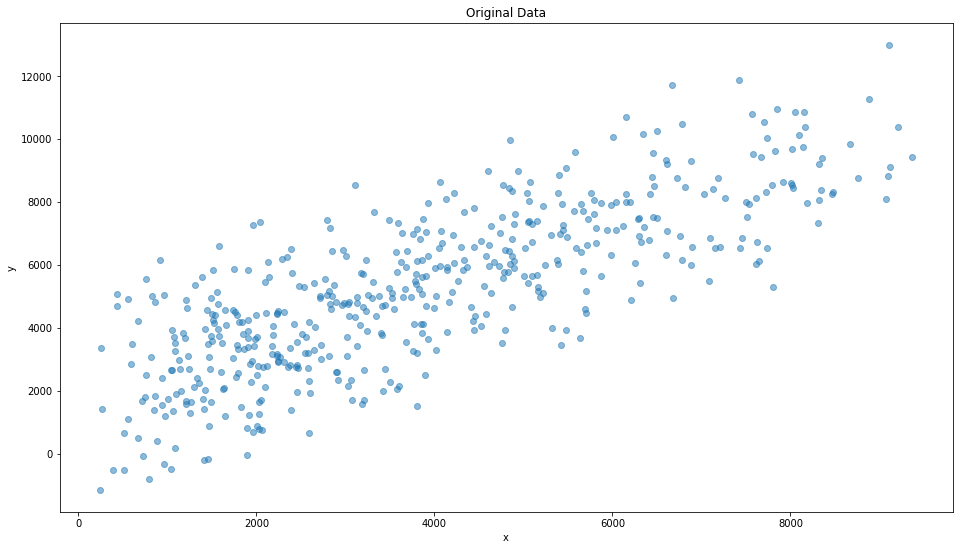

In [4]:
# Convert the data X,Y into appropriate size:
x = dat['X'].values.reshape(-1,1)
y = dat['Y'].values.reshape(-1,1)

# Plot the original data
plt.figure(figsize=(16,9))
plt.scatter(x, y, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Original Data")
plt.show()


## Section 2 - Outlier Detection 

In [5]:
# Define a function that calculates K-distance

def calculate_kn_distance(X, y, k):

    kn_distance = []
    for i in range(len(X)):
        eucl_dist = []
        for j in range(len(X)):
            eucl_dist.append(
                math.sqrt(
                    ((X.item(i) - X.item(j)) ** 2) +
                    ((y.item(i) - y.item(j)) ** 2)))

        eucl_dist.sort()
        kn_distance.append(eucl_dist[k])

    return kn_distance

In [6]:
# Set the eps and minPts value
eps = 525
min_Pts = 3

# Obtain the K-distance value
eps_dist = calculate_kn_distance(x, y, min_Pts)

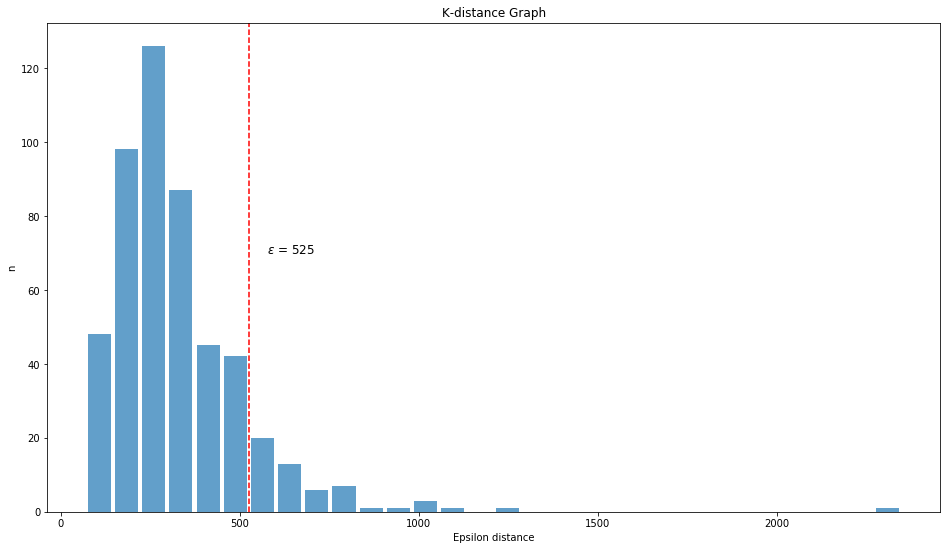

In [7]:
# Plot the K-distance Graph

plt.figure(figsize=(16,9))
plt.hist(eps_dist,bins=30, alpha=0.7, rwidth=0.85)
plt.ylabel('n');
plt.xlabel('Epsilon distance');
plt.title("K-distance Graph")
plt.axvline(x=eps, color="r", linestyle="--")
plt.text(x=eps+50, y=70, s="$\epsilon$ = %i" % eps, fontsize=12)
plt.show()

As we can see, most of the points lie within 525 units euclidean distance from their 3rd K-distance neighborhood, so we set $\epsilon = 525$ and using DBSCAN algorithm from Scikit-Learn, we can identify the outliers:

In [8]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps, min_Pts).fit(dat.to_numpy())

labels = db.labels_
n_noise_ = list(labels).count(-1) 

unique_labels = set(labels) 
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)

print("Estimated number of clusters: " + str(n_clusters_))
print("Estimated number of noise points: " + str(n_noise_))

Estimated number of clusters: 5
Estimated number of noise points: 28


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

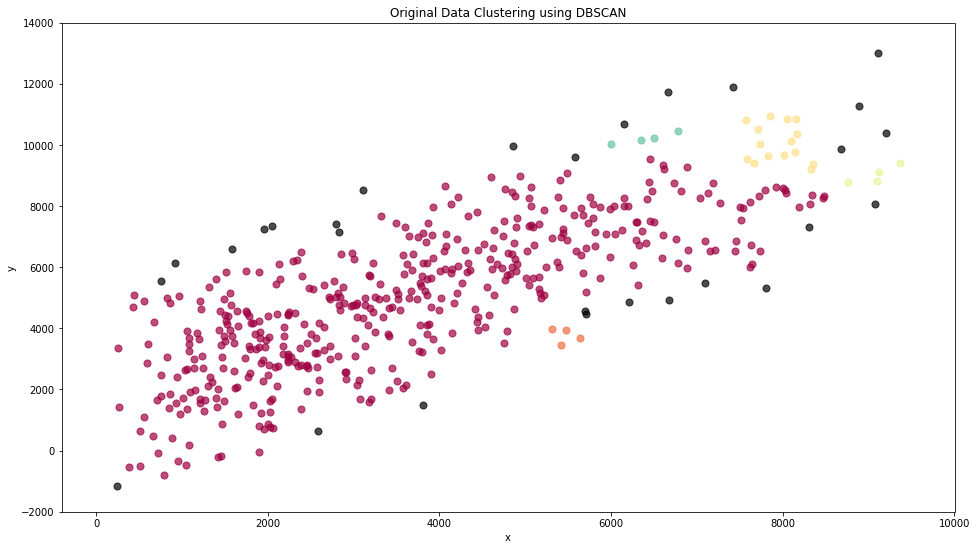

In [9]:
# Create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

# Plot the points with colors
plt.figure(figsize=(16, 9))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    x_p = x[class_member_mask & core_samples_mask]
    y_p = y[class_member_mask & core_samples_mask]
    plt.scatter(x_p, y_p, s=50, c=col, marker=u'o', alpha=0.7)

    # Plot the outliers
    x_o = x[class_member_mask & ~core_samples_mask]
    y_o = y[class_member_mask & ~core_samples_mask]    
    plt.scatter(x_o, y_o, s=50, c=col, marker=u'o', alpha=0.7)
    
plt.title("Original Data Clustering using DBSCAN")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim([-400, 10000])
plt.ylim([-2000, 14000])
plt.show()

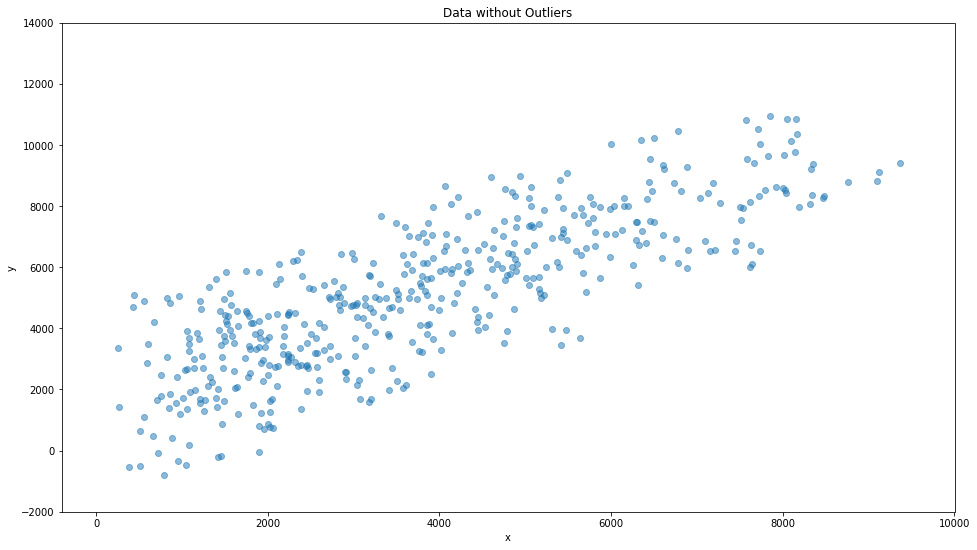

In [10]:
# Remove the outliers
x_cl = x[labels != -1]
y_cl = y[labels != -1]

# Plot the original data
plt.figure(figsize=(16,9))
plt.scatter(x_cl, y_cl, alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Data without Outliers")
plt.xlim([-400, 10000])
plt.ylim([-2000, 14000])
plt.show()

## Section 3 - Estimation of $[\alpha, \beta]$ using Linear Regression

In [11]:
# Use the Linear Regression Model to train, using default training/test size
X_train, X_test, y_train, y_test = train_test_split(x_cl, y_cl, test_size=0.2, random_state=0)

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

a = float(regressor.coef_)
b = float(regressor.intercept_)

#To retrieve the intercept:
print("Intercept: \n", float(regressor.intercept_))
#For retrieving the slope:
print("Coefficients: \n", float(regressor.coef_))

Intercept: 
 1629.8080117191998
Coefficients: 
 0.9346759892290275


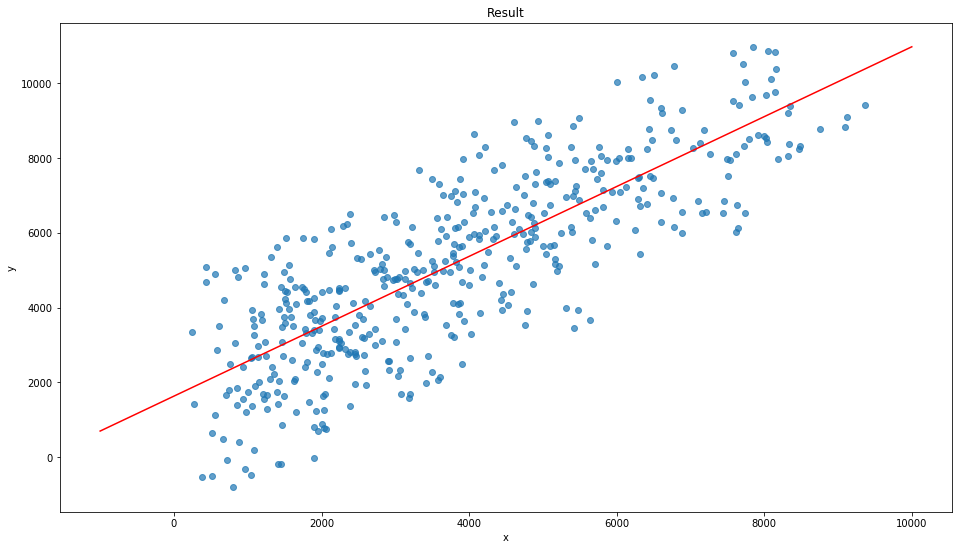

In [12]:
# Plot the result

x0 = np.linspace(-1000,10000,10000)
y0 = a*x0+b
plt.figure(figsize=(16,9))

plt.plot(x0, y0, '-r')
plt.scatter(x_cl,y_cl, alpha=0.7) 
plt.xlabel("x")
plt.ylabel("y")
plt.title("Result")
plt.show()

The estimated result:
- Intercept: 1629.8080117191998
- Coefficients: 0.9346759892290275